In [1]:
from utils.utils import plot_image_grid
from dataloaders.segmentation_dataloaders import create_dataloaders
import numpy as np
import torch

In [2]:
resnet_mean = torch.tensor([0.485, 0.456, 0.406])
resnet_std =  torch.tensor([0.229, 0.224, 0.225])
train_loader, val_loader, test_loader = create_dataloaders(normalize=True, limit=None, mean=resnet_mean, std=resnet_std, batch_size=12, dynamic_load=True)

LOADED METADATA HAS LENGTH 7470
Metadata before split has length 7470
DF_TRAIN LENGTH: 5976
DF_VAL LENGTH: 1494
LOADED METADATA HAS LENGTH 1511
--Data Balance-- balance_data set to True. Training data will be balanced.
--Data Balance-- The most common class is 0 with 4323 images.
--Data Balance-- The second common class is 1 with 582 images with a difference of 3741 images from the most common class.
--Data Balance (Undersampling)-- Keeping 2161 from 0 class..
--Data Balance (Undersampling)-- 0 now has 2161 images
-- Data Balance (Oversampling) -- Adding 1670 from 2 class..
-- Data Balance (Oversampling) -- Adding 1899 from 4 class..
-- Data Balance (Oversampling) -- Adding 1979 from 3 class..
-- Data Balance (Oversampling) -- Adding 1579 from 1 class..
-- Data Balance (Oversampling) -- Adding 2103 from 5 class..
-- Data Balance (Oversampling) -- Adding 2083 from 6 class..


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


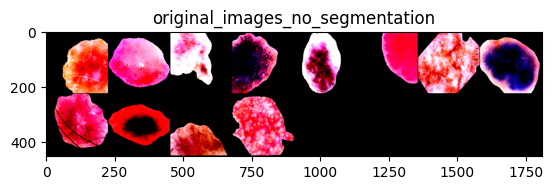

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


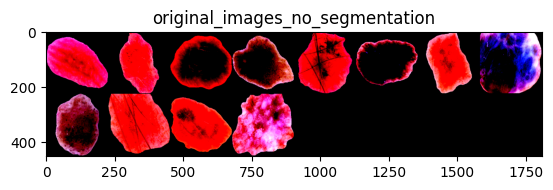

In [3]:
for tr_i, (tr_images, tr_labels) in enumerate(train_loader):
    tr_images = tr_images.to(torch.float32)
    plot_image_grid(tr_images, "original_images_no_segmentation")
    # tr_images = torch.mul(tr_images, segmentations)
    # plot_image_grid(tr_images, "segmented_images_no_crop")
    # tr_images = crop_roi(tr_images, size=(224,224))
    # plot_image_grid(tr_images, "segmented_images")
    # plot_image_grid(segmentations, "segmentations")
    break
for val_i, (val_images, val_labels) in enumerate(val_loader):
    val_images = val_images.to(torch.float32)
    plot_image_grid(val_images, "original_images_no_segmentation")
    # val_images = torch.mul(val_images, segmentations)
    # print(f"Images shape is {val_images.shape}")
    # plot_image_grid(val_images, "segmented_images_no_crop")
    # val_images = crop_roi(val_images, size=(224,224))
    # plot_image_grid(segmentations, "segmentations")
    # plot_image_grid(val_images, "cropped_images")
    break